# Tarea 3 - Aproximación funcional

##  Thomas Martínez Velásquez, Silvio Stiven Villegas Castro y Wilinton Erney Puetate Malte.

**Problema 105** Cuando un fluido incompresible fluye de manera constante a través de una tubería redonda, la caída de presión 
 $\Delta P$ debida a la fricción está dada por:
 
 $$
 \Delta P = -0.5 f \rho V^2 (L/D)
 $$
 
donde $\rho$ es la densidad del fluido, $V$ es la velocidad, $L/D$ es la relación entre la longitud y el diámetro de la tubería y $f$ es el coeficiente de fricción de D'Arcy. Para un flujo laminar, el coeficiente de fricción $f$ se puede relacionar con el número de Reynolds, $Re$, mediante una relación de la forma:

$$
f = a(Re)^b 
$$

Use los datos medidos en la Tabla 5 para determinar $a$ y $b$ mediante un ajuste de mínimos cuadrados.

<img src="tabla.png">

Primero importemos las librerías necesarias

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Sabemos que la relación entre $Re$ y $f$ es de la forma:

$$
f = a(Re)^b 
$$

Por lo tanto podemos inferir que la mejor función que se ajusta a los datos de la **tabla 5** es de la forma:

$$
y(x) = ax^b  \qquad (1)
$$

Donde $a$ y $b$ son las constantes que estamos buscando. De (1) aplicando logaritmo de base 10 a ambos lados obtenemos:

$$
log_{10}(y) = log_{10}(a) + b \cdot log_{10}(x) \qquad (2)
$$

Y así utilizando los datos de la **tabla 5**  en (2) obtenemos el siguiente sistema de ecuaciones:

$$
log_{10}(0.0320) = log_{10}(a) + b \cdot log_{10}(500)
\\
log_{10}(0.0160) = log_{10}(a) + b \cdot log_{10}(1000)
\\
log_{10}(0.0107) = log_{10}(a) + b \cdot log_{10}(1500)
\\
log_{10}(0.0080) = log_{10}(a) + b \cdot log_{10}(2000)
$$

Por lo tanto:

$$
\begin{bmatrix}
log_{10}(0.0320) \\
log_{10}(0.0160) \\
log_{10}(0.0107) \\
log_{10}(0.0080)
\end{bmatrix}
=
\begin{bmatrix}
1 & log_{10}(500) \\
1 & log_{10}(1000) \\
1 & log_{10}(1500) \\
1 & log_{10}(2000)
\end{bmatrix}
\cdot
\begin{bmatrix}
log_{10}(a) \\
b
\end{bmatrix}
$$

Es decir el anterior sistema de ecuaciones es de la forma:

$$
\textbf{b} = A \textbf{x}
$$  

donde:

$$
\textbf{x}
=
\begin{bmatrix}
log_{10}(a) \\
b
\end{bmatrix}
$$

Es el vector de las constantes que queremos determinar mediante un ajuste de mínimos cuadrados. 

Por el teorema de mínimos cuadrados, si $\textbf{x}$ es la solución en mínimos cuadrados de 
$A\textbf{x} = \textbf{b}$ entonces $\textbf{x}$ es la solución de las ecuaciones normales:

$$
A^{T}A \textbf{x} = A^{T} \textbf{b}
$$

Y por lo tanto:

$$
\textbf{x} = \left( A^{T}A \right)^{-1} A^{T} \textbf{b}
$$

Y así:

In [2]:
b = np.array(
    [
        np.log10(0.0320),
        np.log10(0.0160),
        np.log10(0.0107),
        np.log10(0.0080)

    ]
)



A = np.array(
    [
        [1, np.log10(500)],
        [1, np.log10(1000)],
        [1, np.log10(1500)],
        [1, np.log10(2000)]
    ]
)



x = np.dot(
    np.linalg.inv(
        np.dot(np.transpose(A), A)
    ),
    np.dot(np.transpose(A), b)
)

print(x)

[ 1.20179482 -0.99912487]


Es decir, el vector que minimiza ${\lVert b - Ax \rVert} $ es

$$
\textbf{x}
=
\begin{bmatrix}
log_{10}(a) \\
b
\end{bmatrix}
=
\begin{bmatrix}
1.20179482 \\
-0.99912487
\end{bmatrix}
$$

De donde obtenemos:

$$
a = 10^{1.20179482} \approx 16 \qquad b = -0.99912487 \approx -1
$$

Gráfiquemos los puntos de la tabla 5 y a la función $y = ax^b$

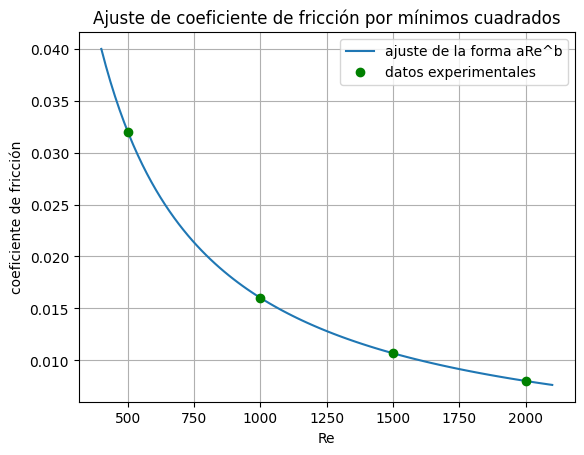

In [9]:
def y(x):
    a = 10 ** (1.20179482)
    b = -0.99912487
    return a * (x ** b)

Re = [500, 1000, 1500, 2000]
f = [0.0320, 0.0160, 0.0107, 0.0080]

x = np.linspace(400, 2100, 100)
plt.plot(x, y(x), label='ajuste de la forma aRe^b')
plt.plot(Re, f, 'go', label='datos experimentales')

plt.xlabel('Re')
plt.ylabel('coeficiente de fricción')
plt.grid(True)
plt.title("Ajuste de coeficiente de fricción por mínimos cuadrados")
plt.legend()
